<a href="https://colab.research.google.com/github/juninhoisrael/Desafio-de-Fraude-TERA/blob/main/Desafio_Fraude_Nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio de Detecção e Redução de Fraudes no Setor Financeiro**
Projeto de um problema de classificação com Machine Learning em dados desbalanceados.

## ◽ **O Problema** 

Embora muito se fale da capacidade de geração de receita das empresas, um dos principais entraves para o sucesso de um negócio está atrelado ao seu custo. A captação de clientes se tornou cada vez mais penosa, assim como a manutenção da carteira. Com isso, a gestão de custo se tornou um fator extremamente estratégico para garantir a margem e o crescimento das empresas.

No entanto, o advento no mundo digital para expandir o negócio ou garantir a sua sobrevivência enfrenta um grande desafio para redução do custo operacional: as fraudes, sobretudo as relacionadas às operações comerciais e financeiras, que impactam, na prática, todos os tipos de indústrias e setores da economia. Do governo, ao banco, do varejista ao microempreendedor, todos precisam conhecer e enfrentar este desafio.

## ◽ **O Objetivo** 
Você precisa propor uma solução para detecção e análise de fraudes que possam reduzir os riscos da empresa e garantir margens saudáveis. Lembre-se, que o resultado do seu trabalho dará ainda mais visibilidade para você e sua área. Seja criterioso, utilize bons argumentos, fatos e justificativas para sua proposta, bem como, claro, faça uma boa execução do seu projeto.

## ◽ **As Etapas do Projeto** 
## 1. Obtenção e Importação dos Dados
## 2. Análise Exploratória dos Dados
## 3. Pré-processamento dos Dados
## 4. Processo de Modelagem
## 5. Considerações Finais

---
# ◾ **Etapa 1.** Introdução

Considerando que o objetivo dos fraudadores em geral é terem benefícios monetários, torna evidente que o setor financeiro é um dos seus principais alvos. Mesmo o crescente investimento em ações preventivas e de monitoramento não têm sido suficientes para barrar ou frear a escalada dos criminosos. De acordo com a Psafe (https://www.psafe.com/), de janeiro a agosto do ano passado foram 920 mil casos somente no Brasil e a cada minuto, 3,6 fraudes acontecem no país. Foram detectados, por exemplo, mais de 11 milhões de tentativas de fishing bancário.

A indústria financeira possui grande representatividade no Brasil e no mundo. Para se ter uma ideia, os ativos dos bancos no Brasil somam R$ 7,4 trilhões, superando o próprio PIB do país (Infomoney)(https://www.infomoney.com.br/economia/ativos-de-bancos-somam-r-74-trilhoes-e-superam-pib-brasileiro/), 25-05-2020).

 De acordo com a ABECS(https://www.abecs.org.br/) (Associação Brasileira das Empresas de Cartão de Crédito e Serviços), foram movimentados R$ 558 bilhões no primeiro trimestre de 2021 e os cartões de crédito representaram R$ 335 bilhões desse total. Foram 6,5 bilhões de transações, um crescimento de 11,8%, com destaque para cartão de débito que apresentou aumento de 163% (veja quadros abaixo). Apesar da opulência destes números, o impacto das fraudes é igualmente gritante. Os crimes cibernéticos, considerando apenas transações de cartão de crédito, já projetavam em 2018 um impacto de 6 trilhões de dólares de perda de receita até 2021 ao redor do mundo.

## ◽ **Importação dos Dados** 

In [1]:
# Permitir o Google Colab utilizar arquivos do Google Drive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd

caminho = '/content/drive/MyDrive/Colab Notebooks/TERA/desafio classificação/fraud.csv' 
dados = pd.read_csv(caminho)  
dados.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2474990,204,CASH_OUT,134893.81,C1054767703,1034.00,0.00,C1975664031,378507.36,513401.17,0,0
4808043,346,CASH_OUT,176739.30,C1882600964,0.00,0.00,C103893589,1012063.26,1188802.57,0,0
1207691,133,CASH_OUT,168217.96,C1117740108,0.00,0.00,C1623760824,367225.19,535443.15,0,0
3698513,277,CASH_OUT,493089.60,C1446463232,0.00,0.00,C281035507,4345039.38,4838128.97,0,0
5700457,398,TRANSFER,437301.37,C1150494735,137645.00,0.00,C249892418,4745.21,442046.58,0,0
2964985,231,CASH_IN,133841.01,C769928778,9436675.58,9570516.59,C1670321843,2615154.37,2481313.37,0,0
4450365,323,TRANSFER,1749066.99,C929853246,0.00,0.00,C1925584280,2750915.96,4499982.95,0,0
38702,9,CASH_OUT,415327.58,C1222665243,4438.00,0.00,C1182461167,2329693.31,2745020.89,0,0
4732502,332,PAYMENT,9017.75,C655685683,1435.00,0.00,M530182863,0.00,0.00,0,0
322867,16,CASH_OUT,11456.03,C1640029698,311558.84,300102.81,C1852430154,151777.97,163234.00,0,0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
dados.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
dados['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [6]:
dados['isFraud'].value_counts()/dados.shape[0]

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

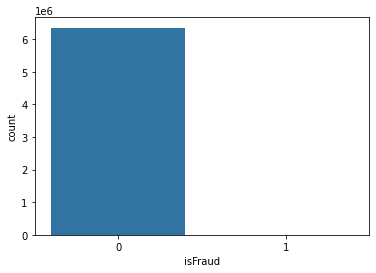

In [7]:
import seaborn as sns

sns.countplot(x = dados['isFraud']);

---
# ◾ **Etapa 2.** Análise Exploratória dos Dados

In [ ]:
#sweetviz
!pip install sweetviz 
import sweetviz as sv
eda = sv.analyze(source = dados, target_feat = 'isFraud')
eda.show_notebook()


**Essa biblioteca faz uma análise exploratória completa, porém consome bastante memória. Recomendo usá-la separadamente para não travar o modelo.**

---
# ◾ **Etapa 3.** Pré-processamento dos Dados

Vamos fazer uma modelagem utilizando **Árvores de Decisão**. 

Árvores são excelentes modelos para serem utilizados em uma primeira análise e começar a sentir o conjunto de dados. 

Uma árvore bem ajustada é um algoritmo que costuma oferecer boa performance preditiva.

O modelo apresenta algumas vaariáveis categóricas, então iremos transformar essas variáveis em numéricas ( int ou float). 

In [8]:
from sklearn.preprocessing import Normalizer, LabelEncoder

In [9]:
# Drop Duplicates
dados.drop_duplicates(keep=False, inplace=True)

In [10]:
%%time
def transfer_category(x):# Função para categorizar os valores de transferência
    if x >= 75000:
        return('HIGH')
    elif x < 75000 and x >= 14000:
        return('MODERATE')
    elif x < 14000:
        return('LOW')
    else:
        return("EXTREMLY LOW")
dados['transfer_amount_category'] = dados.amount.apply(transfer_category)    
dados.head(2)

CPU times: user 2.49 s, sys: 133 ms, total: 2.62 s
Wall time: 3.54 s


In [11]:
label_encoder = LabelEncoder() # Transformar as categóricas em numéricas.
dados['type_encode'] = label_encoder.fit_transform(dados['type']) 
dados['nameOrig_encode'] = label_encoder.fit_transform(dados['nameOrig']) 
dados['nameDest_encode'] = label_encoder.fit_transform(dados['nameDest']) 
dados['transfer_amount_category_encode'] = label_encoder.fit_transform(dados['transfer_amount_category']) 

In [16]:
normalizer = Normalizer()
amount_scale = normalizer.fit_transform(dados.amount.values.reshape(1,-1))
dados['amount_norm'] = amount_scale.reshape(-1,1)
amount_oldbalanceOrg = normalizer.fit_transform(dados.oldbalanceOrg.values.reshape(1,-1))
dados['oldbalanceOrg_norm'] = amount_oldbalanceOrg.reshape(-1,1)
amount_newbalanceOrig = normalizer.fit_transform(dados.newbalanceOrig.values.reshape(1,-1))
dados['newbalanceOrig_norm'] = amount_newbalanceOrig.reshape(-1,1)
amount_oldbalanceDest= normalizer.fit_transform(dados.oldbalanceDest.values.reshape(1,-1))
dados['oldbalanceDest_norm'] = amount_oldbalanceDest.reshape(-1,1)
amount_newbalanceDest = normalizer.fit_transform(dados.newbalanceDest.values.reshape(1,-1))
dados['newbalanceDest_norm'] = amount_newbalanceDest.reshape(-1,1)

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   step                             int64  
 1   type                             object 
 2   amount                           float64
 3   nameOrig                         object 
 4   oldbalanceOrg                    float64
 5   newbalanceOrig                   float64
 6   nameDest                         object 
 7   oldbalanceDest                   float64
 8   newbalanceDest                   float64
 9   isFraud                          int64  
 10  isFlaggedFraud                   int64  
 11  transfer_amount_category         object 
 12  type_encode                      int64  
 13  nameOrig_encode                  int64  
 14  nameDest_encode                  int64  
 15  transfer_amount_category_encode  int64  
 16  amount_norm                      float64
 17  oldbalan

---
# ◾ **Etapa 4.** Processo de Modelagem

In [28]:
from sklearn.model_selection import train_test_split

X = dados[['type_encode','nameOrig_encode','nameDest_encode',
          'transfer_amount_category_encode','amount_norm',
          'oldbalanceOrg_norm','newbalanceOrig_norm',
          'oldbalanceDest_norm','newbalanceDest_norm','isFlaggedFraud']]
y = dados['isFraud']

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = .25, stratify = y, random_state = 333)

dadosTreino = pd.concat([Xtreino, ytreino], axis = 1)
dadosTeste = pd.concat([Xteste, yteste], axis = 1)


In [29]:
import numpy as np

from sklearn.metrics import accuracy_score, recall_score, precision_score, \
                             f1_score, roc_auc_score, confusion_matrix, \
                             classification_report

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)

In [30]:
def Modelagem(Treino, Teste, nome = 'experimento1', iteracoes = 2):
   
    Xtreino = Treino.drop('isFraud', axis = 1)
    ytreino = Treino['isFraud']    
    
    Xteste = Teste.drop('isFraud', axis = 1)
    yteste = Teste['isFraud']

    parametros = {  'criterion': ['gini', 'entropy'],
                    'max_depth' :[2, 3, 4, 5, 6,],
                    'min_samples_split': [10, 20, 30], 
                    }

    modelo = DecisionTreeClassifier()

    arvore = RandomizedSearchCV(modelo, 
                            param_distributions = parametros,
                            scoring = 'f1', 
                            cv = validacao,
                            n_iter = iteracoes, 
                            )


    arvore.fit(Xtreino, ytreino)

    predicoes = arvore.predict(Xteste)

    acc = accuracy_score(predicoes, yteste)
    sen = recall_score(predicoes, yteste)
    pre = precision_score(predicoes, yteste)
    f1s = f1_score(predicoes, yteste)
    auc = roc_auc_score(predicoes, yteste)

    medidas = {'Acurácia': [acc], 'Sensibilidade': [sen], 'Precisão': [pre], 'F1-Score': [f1s], 'AUC': [auc]}

    print(classification_report(predicoes, yteste, digits = 4)[:220])

    print('Matriz de Confusão:\n\n', confusion_matrix(predicoes, yteste))

    return pd.DataFrame(medidas, index = [nome]).round(4), arvore

In [31]:
arvore = Modelagem(dadosTreino, dadosTeste, 'Árvore Simples', 2)

              precision    recall  f1-score   support

           0     1.0000    0.9995    0.9998   1589322
           1     0.6386    0.9835    0.7744      1333

    accuracy                         0.9995   1590655
  
Matriz de Confusão:

 [[1588580     742]
 [     22    1311]]


Interpretação da matriz de confusão:

- O modelo acertou praticamente 100% dos valores verdadeiros ( não fraude = 0)  
- A precisão de 63% dos valores negativos ocorreu por conta do desbalanceamento dos dados, apenas 0,12% são negativos (valores = 1).
- Nesse modelo também podemos identificar corretamente 98% das Fraudes.

In [37]:
arvore[0]

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Árvore Simples,0.9995,0.9835,0.6386,0.7744,0.9915


## ◽ **Ajuste do Ponto de Corte**

In [33]:
from sklearn.metrics import precision_recall_curve 
propensoes = arvore[1].predict_proba(Xteste)[:,1]

precision, recall, thresholds = precision_recall_curve(yteste, propensoes)

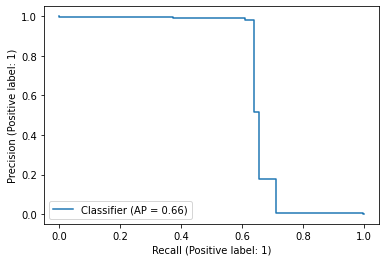

In [34]:
from sklearn.metrics import PrecisionRecallDisplay 
import matplotlib.pyplot as plt
PrecisionRecallDisplay.from_predictions(yteste, propensoes)
plt.show()

In [35]:
#custos
s = 1
p = 2

aux = pd.DataFrame({ 'Sensibilidade': recall[1:], 'Precisao': precision[1:], 'Corte': thresholds })
aux['Custo'] = (p*aux['Precisao'] + s*aux['Sensibilidade'])/(p+s)
aux.sort_values(by = 'Custo', ascending = False)

,Sensibilidade,Precisao,Corte,Custo
6,0.638578,0.983496,0.100000,0.868523
5,0.638578,0.982759,0.032738,0.868032
7,0.608865,0.991277,0.849315,0.863806
8,0.608378,0.991270,0.857143,0.863639
9,0.372138,0.998693,0.975912,0.789841
10,0.000000,1.000000,1.000000,0.666667
4,0.655626,0.514526,0.024595,0.561559
3,0.710667,0.175974,0.001128,0.354205
1,0.999026,0.003623,0.000052,0.335424
0,0.999513,0.003222,0.000000,0.335319


---
# ◾ **Etapa 5. Considerações Finais**

## ◽ **Conclusões** 
- Consertar o problema de desbalanceamento não é fácil!
- A análise do ponto de corte pode melhorar bastante os resultados obtidos, permitindo uma escolha mais adequada para o contexto de negócios. 